In [1]:
import numpy as np 
import math
from PIL import Image
import matplotlib.pyplot as plt

In [21]:
# paramètres: L'image, K et m 
file_path =  'milky-way-nvg.jpg'

In [22]:
image = np.array(Image.open(file_path).convert('L'))
H, W = np.array(image).shape
print("Shape de l'image : ", H, W )

Shape de l'image :  1024 1024


In [ ]:
import numpy as np

def fuzzy_cmeans(img, k, m, epsilon, max_iter=10000):
    H, W = img.shape

    # Init : prof a dit random
    U = np.random.rand(k, H, W)
    U /= U.sum(axis=0, keepdims=True)   # garder la propriété u_ij = 1

    power = 2.0 / (m - 1)

    for _ in range(max_iter):
        U_old = U.copy()

       
        Um = U ** m                              # u_ij^m
        num = (Um * img).sum(axis=(1, 2))        # u_ij^m * x_i
        den = Um.sum(axis=(1, 2))                # u_ij^m
        C = num / den                            # -> (k,)

        # print('Shape of C: ', C.shape)

        # dist[j, h, w] = ||x_i - c_j||
        dist = np.abs(img[None, :, :] - C[:, None, None])  # (k, H, W)

        # ratio[j, l, h, w] = (dist_j / dist_l)^(2/(m-1))
        ratio = (dist[:, None, :, :] / dist[None, :, :, :]) ** power  # (k, k, H, W)

        # u_ij = 1 / sum (dist_j / dist_l)^(2/(m-1))
        U = 1.0 / ratio.sum(axis=1)              # (k, H, W)

        # just for test 
        # U /= U.sum(axis=0, keepdims=True)

         
        U_diff = np.max(np.abs(U-U_old))
        if U_diff < epsilon:
            print('Criteria satisfied ')
            break

    return C, U


In [29]:
# Pour k = 2 
C, U = fuzzy_cmeans(image, 2, 2, 0.01)

Criteria satisfied 


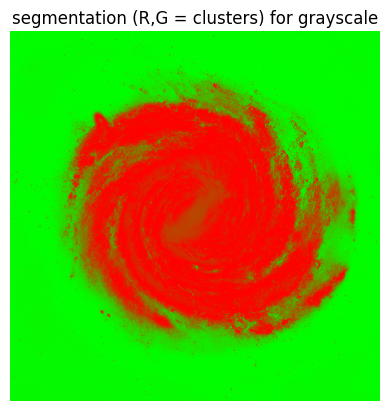

In [ ]:
rgb = np.moveaxis(U, 0, -1) # (H, W, K)

H, W, K = rgb.shape
new_rgb = np.zeros((H, W, K + 1), dtype=rgb.dtype)
new_rgb[..., :K] = rgb 
plt.imshow(new_rgb)
plt.title("segmentation (R,G = clusters) for grayscale image")
plt.axis("off")
plt.show()

In [ ]:
# Pour K = 3
C, U = fuzzy_cmeans(image, 3, 2, 0.01)

Criteria satisfied 


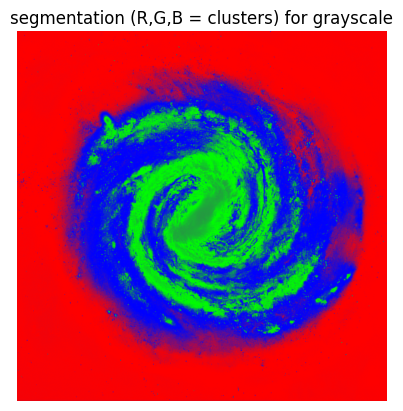

In [ ]:

# respecter le format
rgb = np.moveaxis(U, 0, -1)   # (H, W, 3)

plt.imshow(rgb)
plt.title("segmentation (R,G,B = clusters) for grayscale")
plt.axis("off")
plt.show()

In [26]:
# testing how to broadcast without loop: 
v = np.ones((3,))
x = np.ones((3,3,3))


res = x - v[:, None, None] * 0.5
print('res : ', res)
print('shape of res: ', res.shape)

res :  [[[0.5 0.5 0.5]
  [0.5 0.5 0.5]
  [0.5 0.5 0.5]]

 [[0.5 0.5 0.5]
  [0.5 0.5 0.5]
  [0.5 0.5 0.5]]

 [[0.5 0.5 0.5]
  [0.5 0.5 0.5]
  [0.5 0.5 0.5]]]
shape of res:  (3, 3, 3)


In [27]:
v[:, None, None].shape

(3, 1, 1)

# Case of color image
xi is "[R,G,B]" instead of a scalar (grayscale value)
donc : we need to have something 